# SciyPy 기초 검정
- 이항 검정 (Binomial test): 이항분포의 모수가 예상 모수와 일치하는가?
- **카이 제곱 검정 (Chi-square test)**
    - 카테고리분포가 exp와 일치하는가?
    - 두 확률변수가 독립인가?
- **단일 표본 t-검정 (One-sample t-test)**: 정규분포일 때 기댓값 mu인가?
- **독립 표본 t-검정 (Independent-two-sample t-test)**: 두 집단 기댓값이 같은가?
- 대응 표본 t-검정 (Paired-two-sample t-test)
- 분산 검정 (Chi squared variance test)
- 등분산 검정 (Equal-variance test)
- 정규성 검정 (Normality test)
- **Kolmogorov-Smirove test**: 두 표본이 같은 분포인지 검정

# 1. 이항 검정: 두 가지 값을 가지는 확률변수의 분포 판단
### 이항검정 예1
- 동전 10번 던질 때,
    - 앞: 7
    - 뒤: 3
- 위 동전은 앞면이 더 잘 나오는 동전인가?
- = 앞면 나올 확률이 0.5 초과하는가?
- 귀무가설: 앞면 나올 확률은 0.5. 기각하지 못함

In [22]:
# 실제 모수 0.5
# n: 베르누이 시행, 10개 샘플에서 1(성공) 갯수 
mu_0 = 0.5; N = 10; 
sample = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(sample)
n

3

In [25]:
sp.stats.binom_test(3, N, p=mu_0)

0.3437499999999999

### 이항검정 예2
- 동전 100 번 던졌을 때, 앞면이 52번 나왔다면 
- 위 동전은 앞면이 더 잘 나오는 동전인가? No

In [26]:
mu_0 = 0.5; N = 100; 
sample = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(sample)
n

52

In [28]:
sp.stats.binom_test(n, N, p=mu_0)

0.7643534344026666

### 이항검정 예3
- 동전을 N 번 던졌을 때,
    - N = 10, 유의수준 10% 일 때, 앞면 몇 번 나와야 귀무가설 기각 가능?
- 2 미만, 8 초과

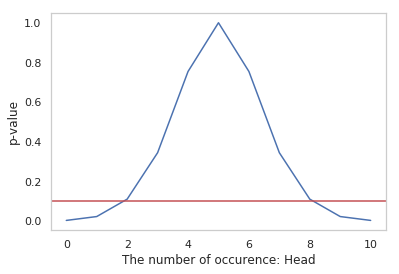

In [133]:
N = 10
pvalue = []
for n in range(N+1):
    pvalue.append(sp.stats.binom_test(n, N, p=0.5))
plt.plot(np.arange(N+1), pvalue)
plt.axhline(0.1, color='r')
plt.xlabel("The number of occurence: Head")
plt.ylabel("p-value")
plt.grid(False)
plt.show()

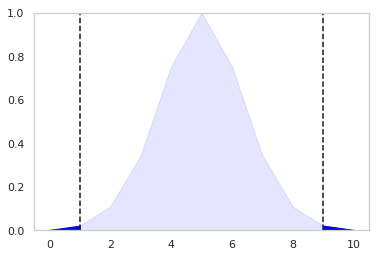

In [134]:
pvalue = pd.Series(pvalue, index=np.arange(N+1))
criteria = pvalue <= 0.1
accept = pvalue[criteria]
plt.fill_between(pvalue.index, pvalue, color='blue', alpha=0.1)
plt.fill_between(accept.index[:2], accept[:2], color='blue')
plt.fill_between(accept.index[2:], accept[2:], color='blue')
plt.axvline(x=1, linestyle= '--', color='k')
plt.axvline(x=9, linestyle= '--', color='k')
plt.ylim(0, 1)
plt.grid(False)
plt.show()

### 이항검정 예4
- 동전을 N 번 던졌을 때,
    - N = 1000, 유의수준 10% 일 때, 앞면 몇 번 나와야 귀무가설 기각 가능?
- 475 이하, 525 이상

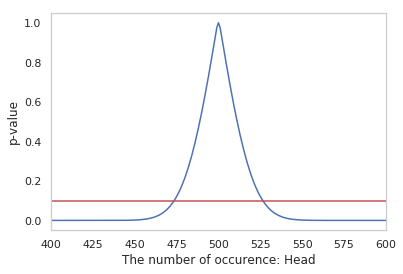

In [132]:
N = 1000
pvalue = []
for n in range(N+1):
    pvalue.append(sp.stats.binom_test(n, N, p=0.5))
plt.plot(np.arange(N+1), pvalue)
plt.axhline(0.1, color='r')
plt.xlabel("The number of occurence: Head")
plt.ylabel("p-value")
plt.xlim(400, 600)
plt.grid(False)
plt.show()

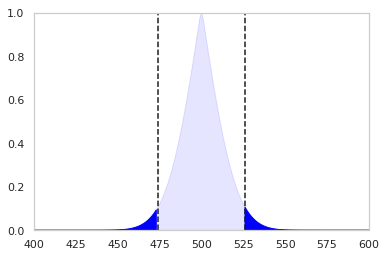

In [131]:
pvalue = pd.Series(pvalue, index=np.arange(N+1))
criteria = pvalue > 0.1
accept = pvalue[criteria]
plt.fill_between(pvalue.index, pvalue, color='blue', alpha=0.1)

start = accept.index[0]
end = accept.index[-1]
plt.fill_between(range(N)[:start], pvalue[:start], 0, color='blue')
plt.fill_between(range(N+1)[end:], pvalue[end:], 0, color='blue')
plt.axvline(x=start, linestyle= '--', color='k')
plt.axvline(x=end, linestyle= '--', color='k')
plt.xlim(400, 600)
plt.ylim(0, 1)
plt.grid(False)
plt.show()

### 이항검정 예5
- 찬반 조사: 70%가 찬성
- 국민(모집단)의 2/3이 넘게 찬성한다는 결론을 유의 수준 1%에서 판단하려면 응답자수 몇
명 이상?
    - 우측 유의 확률

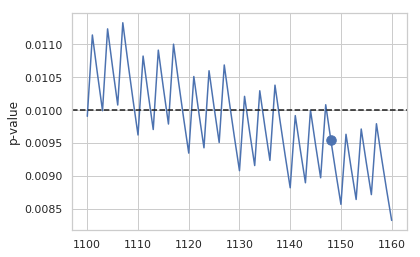

In [161]:
pvalue = []
N = 1160
range_ = range(1100, N+1)
for n in range_:
    p = sp.stats.binom_test(0.7 * n, n, p=2/3, alternative='greater')
    pvalue.append(p)

n = 1148
n_p = sp.stats.binom_test(0.7 * n, n, p=2/3, alternative='greater')
       
plt.plot(range_, pvalue)
plt.axhline(y=0.01, linestyle='--', color='k')
plt.scatter(n, n_p, s=90)
plt.ylabel('p-value')
plt.show()

---

# 2. 카이 제곱 검정(1): 카테고리분포 모수 가설 조사
### goodness of fit test
- 모든 카테고리 나올 확률 공정한가?

In [165]:
# 4면체 10번 던졌을 때, 각 면이 나온 횟수
N = 10
K = 4
mu_0 = np.ones(K)/K

x = np.random.choice(K, N, p)
n = np.bincount(x, minlength=K)
n

array([3, 1, 3, 3])

In [171]:
obs = np.array([3, 0, 0, 0])
exp = np.array([0.25*3, 0.25*3, 0.25*3, 0.25*3])
sp.stats.chisquare(obs, exp)

Power_divergenceResult(statistic=9.0, pvalue=0.02929088653488826)

- 모수가 등분이 아닐 때

In [172]:
N = 100
K = 4
mu_0 = np.array([0.35, 0.30, 0.20, 0.15])
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([37, 33, 15, 15])

In [174]:
sp.stats.chisquare(n, mu_0*N)

Power_divergenceResult(statistic=1.6642857142857141, pvalue=0.6449028660305953)

### 카이 제곱 검정(1) 예1
- 4 면체 주사위 3번 던졌을 때,
- 3번 모두 1이 나왔다면 주사위는 공정한가?
- 유의수준 3%: 기각, 공정하지 않음

In [168]:
sp.stats.chisquare(np.array([3,0,0,0]))

Power_divergenceResult(statistic=9.0, pvalue=0.02929088653488826)

---

# 3. 카이 제곱 검정(2): 범주형 확률변수 간 독립여부
### 귀무가설: 독립

In [175]:
obs = np.array([[5, 15],
                [10, 20]])
sp.stats.chi2_contingency(obs,)

(0.0992063492063492, 0.7527841326498471, 1, array([[ 6., 14.],
        [ 9., 21.]]))

### 카이 제곱 검정(2) 예1
- 수업 들은 학생 학점 분포: 4, 16, 20
- 안들은 학생 분포: 23, 18, 19
- 귀무가설 기각: 독립X

In [176]:
obs = np.array([[4, 16, 20],
               [23, 18, 19]])
sp.stats.chi2_contingency(obs)

(9.910060890453046, 0.00704786570249751, 2, array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

----

# 4. 단일 표본 t-검정 One-sample t-test
### 정규분포 모수 기댓값이 mu인지 검사

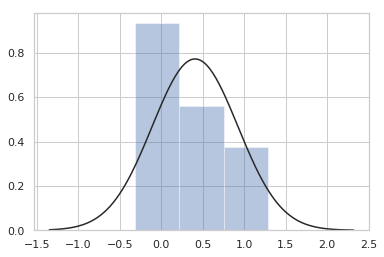

In [194]:
# mu = 0
N = 10; mu_0 = 0
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [198]:
# 유의수준 3%에서 귀무가설 성립
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.3525596749498336, pvalue=0.043123869250344005)

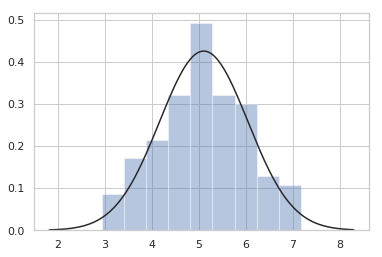

In [199]:
# mu_0 = 5
N = 100; mu_0 = 5
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [201]:
# 유의수준 3%에서 귀무가설 성립
sp.stats.ttest_1samp(x, popmean=5)

Ttest_1sampResult(statistic=1.0707330751268116, pvalue=0.286892939529473)

---

# 5. 독립 표본 t-검정 Independent-two-sample t-test
### 귀무가설: 기댓값 동일
- 두 개의 독립적인 정규분포에서 나온 N, M 개의 데이터 셋을 사용
- 두 정규 분포의 기댓값이 동일한지 검사
- 등분산 여부 모르면 `equal_var=False`

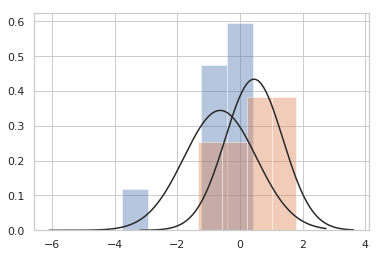

In [183]:
# 샘플수 10
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1

x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [184]:
np.mean(x1), np.mean(x2)

(-0.633908976759515, 0.44641580049465757)

In [185]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-2.190476852611547, pvalue=0.04261703836609451)

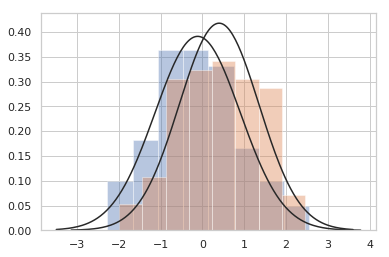

In [186]:
N_1 = 100; mu_1 = 0; sigma_1 = 1
N_2 = 100; mu_2 = 0.5; sigma_2 = 1

x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [187]:
np.mean(x1), np.mean(x2)

(-0.11491908003495595, 0.3982785742299076)

In [188]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-3.6540766320275124, pvalue=0.000330869218712974)

### 독립 표본 t-검정 예1
- 두 집단의 모수 기댓값 같음
- 실력 차이 없음

In [193]:
x1 = np.array([80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80])
x2 = np.array([80, 85, 70, 80, 35, 55, 80])
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

---

# 6. 등분산 검정 Equal-variance test: 두 샘플의 분산 모수가 같은지 확인
### 귀무가설: 등분산

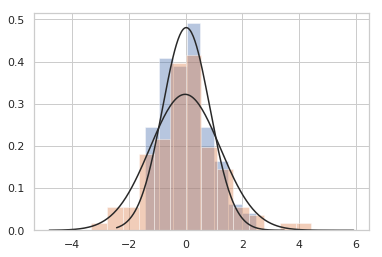

In [202]:
N1 = 100; N2 = 100;
sigma_1 = 1; sigma_2 = 1.2

x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)

sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)

plt.show()

In [203]:
x1.std(), x2.std()

(0.830350164236609, 1.2378678279504765)

In [204]:
# bartlett
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=15.304737977781903, pvalue=9.148676067337196e-05)

In [205]:
# flinger
sp.stats.fligner(x1, x2)

FlignerResult(statistic=4.1657669000613815, pvalue=0.04124873547614382)

In [206]:
# levene
sp.stats.levene(x1, x2)

LeveneResult(statistic=5.820286459312568, pvalue=0.01675411819434604)

# 7. 정규성 검정
### 가우시안 정규분포 여부 확인

In [208]:
x = sp.stats.norm(0, 1).rvs(10)
sp.stats.shapiro(x)

(0.9501180052757263, 0.6698970198631287)

# 8. Kolmogorov-Smirove 검정
### 두 표본이 같은 분포를 따르는지 확인
### 귀무가설: 같은 분포

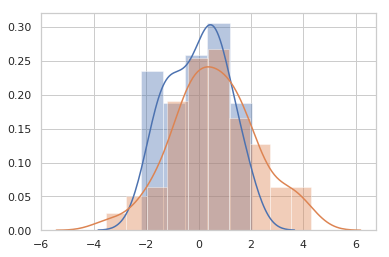

In [207]:
N = 50; N2 = 100;
x1 = sp.stats.norm(0, 1).rvs(N)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)

sns.distplot(x1)
sns.distplot(x2)
plt.show()

In [209]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.27, pvalue=0.012231085367552404)